In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from monai import transforms as mt

from singlenet import get_dataset
from singlenet.transforms.cell_loader import VTKLoader, CellLabeld, CellIndexLoaderd
from singlenet.transforms.rand_cell_crop import RandCellCropd
from singlenet.transforms.cell_type import CellTyped

In [2]:
transforms = mt.Compose(
    [
        VTKLoader(keys=["image"]),
        CellIndexLoaderd(keys=["label"]),
        CellLabeld(cluster_key="image_cluster", indices_key="label", output_key="label"),
        RandCellCropd(keys=["image", "label"], crop_size=128),
        # CellTyped(),
        mt.ToTensord(keys=["image", "label"]),
    ]
)

In [3]:
dataset = get_dataset(Path(r"../../data/hires"))

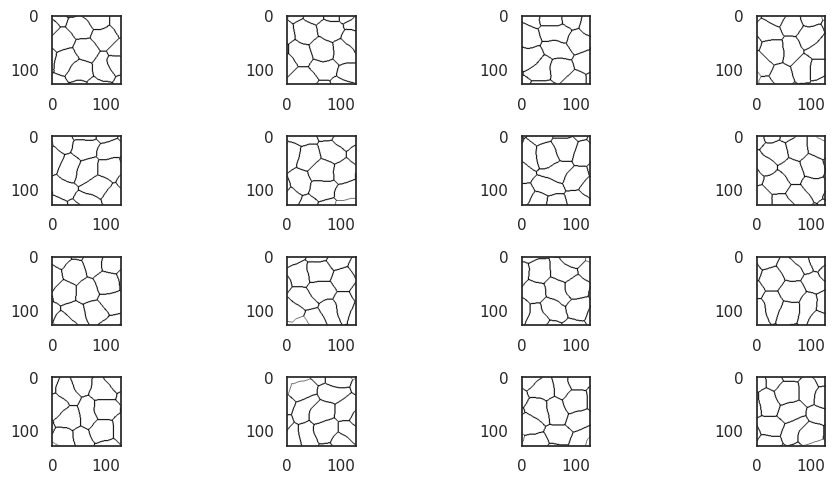

In [4]:
example = transforms(dataset[0])

n_plots = 4
sns.set_style("white")
sns.set_context("notebook")
fig, ax = plt.subplots(n_plots, n_plots, figsize=(10, 5))
for i in range(n_plots):
    for j in range(n_plots):
        example = transforms(dataset[i])
        ax[i, j].imshow(example["image"])
        # ax[i, j].set_title(example["label"])

plt.tight_layout()
plt.show()

In [10]:
example

{'image': metatensor([[[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
 
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         ...,
 
         [[255, 255, 255],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
 
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
 
         [[255, 255, 255],
          [255, 255, 255],
          [255, 2